In [8]:
from pymoo.problems.functional import FunctionalProblem
from pymoo.optimize import minimize
from pymoo.problems.static import StaticProblem
from pymoo.visualization.scatter import Scatter
from pymoo.algorithms.moo.nsga2 import NSGA2
import numpy as np
from pymoo.core.problem import Problem
from Problems import DTLZ2

from pymoo.operators.selection.tournament import TournamentSelection

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |     1000 |    195 |             - |             -
     2 |     2000 |    275 |  0.0046272058 |         ideal
     3 |     3000 |    405 |  0.1905316375 |         nadir
     4 |     4000 |    550 |  0.1874415931 |         nadir
     5 |     5000 |    807 |  0.1308759162 |         nadir
     6 |     6000 |   1000 |  0.1086179424 |         nadir
     7 |     7000 |   1000 |  0.0799216688 |         nadir
     8 |     8000 |   1000 |  0.0828039613 |         nadir
     9 |     9000 |   1000 |  0.0673171282 |         nadir
    10 |    10000 |   1000 |  0.0097783139 |         nadir
    11 |    11000 |   1000 |  0.0063148965 |             f
    12 |    12000 |   1000 |  0.0056113026 |             f
    13 |    13000 |   1000 |  0.0054900423 |             f
    14 |    14000 |   1000 |  0.0204873386 |         nadir
    15 |    15000 |   1000 |  0.0036178148 |         nadir
    16 |    16000 |   1000 |  0.0055434137 |            

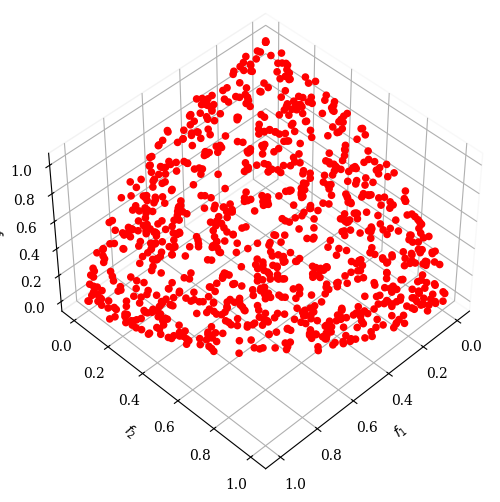

In [10]:
k = 10  # Number of distance variables
n_var = 12  # Total number of decision variables (k + M - 1)
n_obj = 3  # Number of objectives

# Define the objective functions using lambda expressions
objs = [
    lambda x: (1 + np.sum((x[:, n_obj - 1:] - 0.5) ** 2, axis=1)) * np.cos(x[:, 0] * np.pi / 2),
    lambda x: (1 + np.sum((x[:, n_obj - 1:] - 0.5) ** 2, axis=1)) * np.sin(x[:, 0] * np.pi / 2)
]

class OWN_DTLZ(Problem):
    def __init__(self, n_var=12, n_obj=2, my_problem=object):
        self.my_problem = my_problem
        super().__init__(n_var=n_var, n_obj=n_obj, n_constr=0, xl=0, xu=1)

    def _evaluate(self, x, out, *args, **kwargs):
        f = self.my_problem.evaluate(x)
        out["F"] = f


dtlz2 = DTLZ2(n_var=n_var, n_obj=n_obj)
problem = OWN_DTLZ(n_var=n_var, n_obj=n_obj, my_problem=dtlz2)
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
                algorithm,
                ('n_gen', 100),
                seed=1,
                verbose=True)

plot = Scatter().add(res.F, color="red")
plot.show()